In [ ]:
"""
To filter the connectome by a soma threshold

"""

In [2]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
from os import sys
sys.path.append("/meshAfterParty/")

In [8]:
import datajoint_utils as du
minnie,schema = du.configure_minnie_vm()

INFO - 2021-02-08 16:08:31,729 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-02-08 16:08:31,730 - settings - Setting database.user to celiib
INFO - 2021-02-08 16:08:31,731 - settings - Setting database.password to newceliipass
INFO - 2021-02-08 16:08:31,742 - settings - Setting stores to {'minnie65': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65', 'stage': '/mnt/dj-stor01/platinum/minnie65'}, 'meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/meshes'}, 'decimated_meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes'}, 'skeletons': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/skeletons'}}
INFO - 2021-02-08 16:08:31,743 - settings - Setting enable_python_native_blobs to True
INFO - 2021-02-08 16:08:31,754 - connection - Connect

Connecting celiib@at-database.ad.bcm.edu:3306


INFO - 2021-02-08 16:08:32,045 - settings - Setting enable_python_native_blobs to True
INFO - 2021-02-08 16:08:32,079 - settings - Setting enable_python_native_blobs to True
INFO - 2021-02-08 16:08:32,378 - settings - Setting enable_python_native_blobs to True


In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import networkx_utils as xu
import neuron_visualizations as nviz

In [15]:
import matplotlib.pyplot as plt

# Looking at the soma size distribution

In [11]:
len(minnie.AutoProofreadNeurons())

81072

In [23]:
soma_sizes,soma_volumes,soma_n_limbs = minnie.AutoProofreadNeurons().fetch("max_soma_n_faces",
                                                             "max_soma_volume",
                                                             "n_limbs")

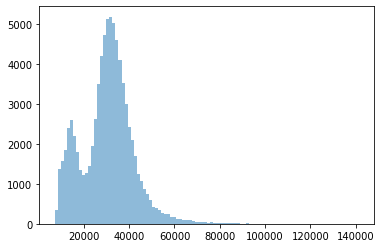

In [18]:
bin_info = plt.hist(soma_sizes,bins=100,alpha=0.5)

In [19]:
(multi_nuc_faces,
 multi_nuc_volume,
 multi_nuc_n_limbs) = (minnie.AutoProofreadNeurons() & "n_nuclei_in_bbox>1").fetch("max_soma_n_faces","max_soma_volume",
                                                            "n_limbs")
(multi_nuc_faces,
 multi_nuc_volume,
 multi_nuc_n_limbs)


(array([18051, 13240, 27066, ..., 45878, 51390, 62178]),
 array([ 480,  151,  310, ..., 1258, 1466, 1632]),
 array([ 7,  0,  5, ...,  5, 11, 12]))

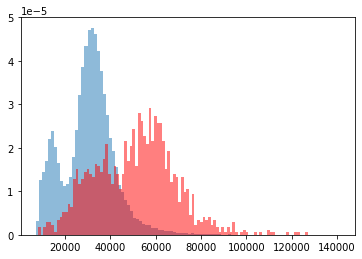

In [22]:
# plotting the size distribution
bin_info = plt.hist(soma_sizes,bins=100,alpha=0.5,density=True)
bin_info = plt.hist(multi_nuc_faces,bins=100,alpha=0.5,color="red",density=True)


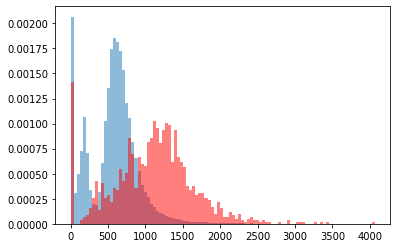

In [25]:
# plotting the size distribution
bin_info = plt.hist(soma_volumes,bins=100,alpha=0.5,density=True)
bin_info = plt.hist(multi_nuc_volume,bins=100,alpha=0.5,color="red",density=True)


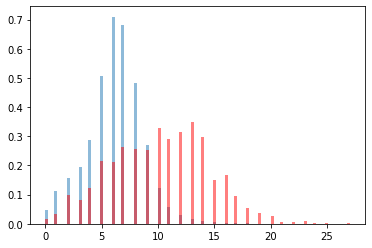

In [26]:
# plotting the size distribution
bin_info = plt.hist(soma_n_limbs,bins=100,alpha=0.5,density=True)
bin_info = plt.hist(multi_nuc_n_limbs,bins=100,alpha=0.5,color="red",density=True)


# Visualizing Some of the Somas

In [45]:
soma_size_limit = 60_000
minnie.AutoProofreadNeurons() & "n_limbs>15"

INFO - 2021-02-08 16:53:35,731 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-02-08 16:53:35,732 - settings - Setting database.user to celiib
INFO - 2021-02-08 16:53:35,733 - settings - Setting database.password to newceliipass
INFO - 2021-02-08 16:53:35,737 - settings - Setting enable_python_native_blobs to True
INFO - 2021-02-08 16:53:36,124 - settings - Setting enable_python_native_blobs to True


segment_id segment id unique within each Segmentation,decimation_version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses),ver the version number of the materializaiton,process_version the version of the preprocessing pipeline run,index the index of the neuron object that resulted from that mesh (indexed starting at 0),split_index the index of the neuron object that resulted AFTER THE SPLITTING ALGORITHM,proof_version the version of code used for this cell typing classification,multiplicity the total number of neurons that came from the parent segment id,cell_type_predicted morphology predicted by classifier,spine_category,n_axons Number of axon candidates identified,n_apicals Number of apicals identified,nucleus_id id of nucleus from the flat segmentation Equivalent to Allen: 'id'.,nuclei_distance the distance to the closest nuclei (even if no matching nuclei found),n_nuclei_in_radius the number of nuclei within the search radius of 15000 belonging to that segment,n_nuclei_in_bbox the number of nuclei within the bounding box of that soma,"soma_x x coordinate of nucleus centroid in EM voxels (x: 4nm, y: 4nm, z: 40nm)","soma_y y coordinate of nucleus centroid in EM voxels (x: 4nm, y: 4nm, z: 40nm)","soma_z z coordinate of nucleus centroid in EM voxels (x: 4nm, y: 4nm, z: 40nm)",max_soma_n_faces The largest number of faces of the somas,max_soma_volume The largest volume of the somas the (volume in billions (10*9 nm^3)),mesh_faces faces indices that were saved off as belonging to proofread neuron (external storage),n_vertices number of vertices,n_faces number of faces,n_not_processed_soma_containing_meshes the number of meshes with somas that were not processed,n_error_limbs the number of limbs that are touching multiple somas or 1 soma in multiple places,n_same_soma_multi_touching_limbs number of limbs that touch the same soma multiple times,n_multi_soma_touching_limbs number of limbs that touch multiple somas,n_somas number of soma meshes detected,n_limbs,n_branches,max_limb_n_branches,skeletal_length,max_limb_skeletal_length,median_branch_length gives information on average skeletal length to next branch point,width_median median width from mesh center without spines removed,width_no_spine_median median width from mesh center with spines removed,width_90_perc 90th percentile for width without spines removed,width_no_spine_90_perc 90th percentile for width with spines removed,n_spines,spine_density n_spines/ skeletal_length,spines_per_branch,skeletal_length_eligible the skeletal length for all branches searched for spines,n_spine_eligible_branches the number of branches that were checked for spines because passed width threshold,spine_density_eligible n_spines/skeletal_length_eligible,spines_per_branch_eligible n_spines/n_spine_eligible_branches,total_spine_volume the sum of all spine volume,spine_volume_median median of the spine volume for those spines with able to calculate volume,spine_volume_density total_spine_volume/skeletal_length,spine_volume_density_eligible total_spine_volume/skeletal_length_eligible,spine_volume_per_branch_eligible total_spine_volume/n_spine_eligible_branches,axon_angle_maximum the anlge of an identified axon,spine_density_classifier the number of spines divided by skeletal length for branches analyzed in classification,n_branches_processed the number branches used for the spine density analysis,skeletal_length_processed The total skeletal length of the viable branches used for the spine density analysis,n_branches_in_search_radius the number branches existing in the search radius used for spine density,skeletal_length_in_search_radius The total skeletal length of the branches existing in the search radius used for spine density,run_time the amount of time to run (seconds)
864691134939994979,0,0.25,30.00,0,0,0,0,1,excitatory,densely_spined,3,3,297274,3407.47,2,2,191984,146764,25820,65792,1394,=BLOB=,806540,1607486,0,0,0,0,1,16,1

In [63]:
import datajoint as dj
dj.config["display.limit"] = 100
minnie.AutoProofreadNeurons() & "n_faces>150000 AND n_faces < 200000 AND spine_category='densely_spined' " & (minnie.ProofreadStats() & " axon_on_dendrite_merges_error_length>0 AND high_degree_coordinates_error_length>0 AND n_presyn_error_syn>0").proj()

INFO - 2021-02-08 17:09:59,830 - settings - Setting display.limit to 100


segment_id segment id unique within each Segmentation,decimation_version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses),ver the version number of the materializaiton,process_version the version of the preprocessing pipeline run,index the index of the neuron object that resulted from that mesh (indexed starting at 0),split_index the index of the neuron object that resulted AFTER THE SPLITTING ALGORITHM,proof_version the version of code used for this cell typing classification,multiplicity the total number of neurons that came from the parent segment id,cell_type_predicted morphology predicted by classifier,spine_category,n_axons Number of axon candidates identified,n_apicals Number of apicals identified,nucleus_id id of nucleus from the flat segmentation Equivalent to Allen: 'id'.,nuclei_distance the distance to the closest nuclei (even if no matching nuclei found),n_nuclei_in_radius the number of nuclei within the search radius of 15000 belonging to that segment,n_nuclei_in_bbox the number of nuclei within the bounding box of that soma,"soma_x x coordinate of nucleus centroid in EM voxels (x: 4nm, y: 4nm, z: 40nm)","soma_y y coordinate of nucleus centroid in EM voxels (x: 4nm, y: 4nm, z: 40nm)","soma_z z coordinate of nucleus centroid in EM voxels (x: 4nm, y: 4nm, z: 40nm)",max_soma_n_faces The largest number of faces of the somas,max_soma_volume The largest volume of the somas the (volume in billions (10*9 nm^3)),mesh_faces faces indices that were saved off as belonging to proofread neuron (external storage),n_vertices number of vertices,n_faces number of faces,n_not_processed_soma_containing_meshes the number of meshes with somas that were not processed,n_error_limbs the number of limbs that are touching multiple somas or 1 soma in multiple places,n_same_soma_multi_touching_limbs number of limbs that touch the same soma multiple times,n_multi_soma_touching_limbs number of limbs that touch multiple somas,n_somas number of soma meshes detected,n_limbs,n_branches,max_limb_n_branches,skeletal_length,max_limb_skeletal_length,median_branch_length gives information on average skeletal length to next branch point,width_median median width from mesh center without spines removed,width_no_spine_median median width from mesh center with spines removed,width_90_perc 90th percentile for width without spines removed,width_no_spine_90_perc 90th percentile for width with spines removed,n_spines,spine_density n_spines/ skeletal_length,spines_per_branch,skeletal_length_eligible the skeletal length for all branches searched for spines,n_spine_eligible_branches the number of branches that were checked for spines because passed width threshold,spine_density_eligible n_spines/skeletal_length_eligible,spines_per_branch_eligible n_spines/n_spine_eligible_branches,total_spine_volume the sum of all spine volume,spine_volume_median median of the spine volume for those spines with able to calculate volume,spine_volume_density total_spine_volume/skeletal_length,spine_volume_density_eligible total_spine_volume/skeletal_length_eligible,spine_volume_per_branch_eligible total_spine_volume/n_spine_eligible_branches,axon_angle_maximum the anlge of an identified axon,spine_density_classifier the number of spines divided by skeletal length for branches analyzed in classification,n_branches_processed the number branches used for the spine density analysis,skeletal_length_processed The total skeletal length of the viable branches used for the spine density analysis,n_branches_in_search_radius the number branches existing in the search radius used for spine density,skeletal_length_in_search_radius The total skeletal length of the branches existing in the search radius used for spine density,run_time the amount of time to run (seconds)
864691134988385914,0,0.25,30.00,5,0,1,0,2,excitatory,densely_spined,1,1,610607,1401.24,2,1,345611,123731,21049,28354,723,=BLOB=,89344,176986,0,0,0,0,1,4,39,20

In [64]:
segment_id=864691136443744643
minnie.ProofreadStats() & dict(segment_id=segment_id)

segment_id segment id unique within each Segmentation,decimation_version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses),ver the version number of the materializaiton,process_version the version of the preprocessing pipeline run,index the index of the neuron object that resulted from that mesh (indexed starting at 0),split_index the index of the neuron object that resulted AFTER THE SPLITTING ALGORITHM,proof_version the version of code used for this cell typing classification,axon_on_dendrite_merges_error_area the area (in um ^ 2) of the faces canceled out by filter,axon_on_dendrite_merges_error_length the length (in um) of skeleton distance canceled out by filter,low_branch_clusters_error_area the area (in um ^ 2) of the faces canceled out by filter,low_branch_clusters_error_length the length (in um) of skeleton distance canceled out by filter,dendrite_on_axon_merges_error_area the area (in um ^ 2) of the faces canceled out by filter,dendrite_on_axon_merges_error_length the length (in um) of skeleton distance canceled out by filter,double_back_and_width_change_error_area the area (in um ^ 2) of the faces canceled out by filter,double_back_and_width_change_error_length the length (in um) of skeleton distance canceled out by filter,crossovers_error_area the area (in um ^ 2) of the faces canceled out by filter,crossovers_error_length the length (in um) of skeleton distance canceled out by filter,high_degree_coordinates_error_area the area (in um ^ 2) of the faces canceled out by filter,high_degree_coordinates_error_length the length (in um) of skeleton distance canceled out by filter,n_valid_syn_presyn_for_split,n_valid_syn_postsyn_for_split,n_presyn_error_syn,n_postsyn_error_syn,total_error_synapses,total_presyns,total_postsyns,total_synapses,perc_error_presyn,perc_error_postsyn,overall_percent_error
864691136443744643,0,0.25,30.00,3,0,0,0,166.84,200.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21,439,133,1,134,305,440,745,0.4361,0.0023,0.1799
864691136443744643,0,0.25,30.00,3,0,1,0,104.12,54.1,0.0,0.0,0.0,0.0,0.0,0.0,69.93,41.33,791.37,848.57,151,0,133,1,134,305,440,745,0.4361,0.0023,0.1799


In [69]:
du.plot_proofread_neuron_with_synapses(segment_id,split_index=0,
                                      plot_errored_faces=True)

Proofread Mesh = <trimesh.Trimesh(vertices.shape=(590745, 3), faces.shape=(1178900, 3))>
error_mesh = <trimesh.Trimesh(vertices.shape=(156662, 3), faces.shape=(328804, 3))>
Synapsse Results:
Total Number of Synapses = 745
n_valid_presyn = 21, n_error_presyn = 284
n_valid_postsyn = 439, n_error_postsyn = 1


/usr/local/lib/python3.6/dist-packages/traittypes/traittypes.py:101: UserWarning: Given trait value dtype "float64" does not match required type "float64". A coerced copy has been created.
  np.dtype(self.dtype).name))


In [30]:
minnie.AutoProofreadNeurons() & f"max_soma_n_faces>{soma_size_limit}"

segment_id segment id unique within each Segmentation,decimation_version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses),ver the version number of the materializaiton,process_version the version of the preprocessing pipeline run,index the index of the neuron object that resulted from that mesh (indexed starting at 0),split_index the index of the neuron object that resulted AFTER THE SPLITTING ALGORITHM,proof_version the version of code used for this cell typing classification,multiplicity the total number of neurons that came from the parent segment id,cell_type_predicted morphology predicted by classifier,spine_category,n_axons Number of axon candidates identified,n_apicals Number of apicals identified,nucleus_id id of nucleus from the flat segmentation Equivalent to Allen: 'id'.,nuclei_distance the distance to the closest nuclei (even if no matching nuclei found),n_nuclei_in_radius the number of nuclei within the search radius of 15000 belonging to that segment,n_nuclei_in_bbox the number of nuclei within the bounding box of that soma,"soma_x x coordinate of nucleus centroid in EM voxels (x: 4nm, y: 4nm, z: 40nm)","soma_y y coordinate of nucleus centroid in EM voxels (x: 4nm, y: 4nm, z: 40nm)","soma_z z coordinate of nucleus centroid in EM voxels (x: 4nm, y: 4nm, z: 40nm)",max_soma_n_faces The largest number of faces of the somas,max_soma_volume The largest volume of the somas the (volume in billions (10*9 nm^3)),mesh_faces faces indices that were saved off as belonging to proofread neuron (external storage),n_vertices number of vertices,n_faces number of faces,n_not_processed_soma_containing_meshes the number of meshes with somas that were not processed,n_error_limbs the number of limbs that are touching multiple somas or 1 soma in multiple places,n_same_soma_multi_touching_limbs number of limbs that touch the same soma multiple times,n_multi_soma_touching_limbs number of limbs that touch multiple somas,n_somas number of soma meshes detected,n_limbs,n_branches,max_limb_n_branches,skeletal_length,max_limb_skeletal_length,median_branch_length gives information on average skeletal length to next branch point,width_median median width from mesh center without spines removed,width_no_spine_median median width from mesh center with spines removed,width_90_perc 90th percentile for width without spines removed,width_no_spine_90_perc 90th percentile for width with spines removed,n_spines,spine_density n_spines/ skeletal_length,spines_per_branch,skeletal_length_eligible the skeletal length for all branches searched for spines,n_spine_eligible_branches the number of branches that were checked for spines because passed width threshold,spine_density_eligible n_spines/skeletal_length_eligible,spines_per_branch_eligible n_spines/n_spine_eligible_branches,total_spine_volume the sum of all spine volume,spine_volume_median median of the spine volume for those spines with able to calculate volume,spine_volume_density total_spine_volume/skeletal_length,spine_volume_density_eligible total_spine_volume/skeletal_length_eligible,spine_volume_per_branch_eligible total_spine_volume/n_spine_eligible_branches,axon_angle_maximum the anlge of an identified axon,spine_density_classifier the number of spines divided by skeletal length for branches analyzed in classification,n_branches_processed the number branches used for the spine density analysis,skeletal_length_processed The total skeletal length of the viable branches used for the spine density analysis,n_branches_in_search_radius the number branches existing in the search radius used for spine density,skeletal_length_in_search_radius The total skeletal length of the branches existing in the search radius used for spine density,run_time the amount of time to run (seconds)
864691134878497274,0,0.25,30.00,0,0,0,0,1,inhibitory,no_spined,1,1,472206,24321.82,0,1,276035,273898,17945,81837,1354,=BLOB=,45465,85715,0,0,0,0,1,2,3,2,10391

In [32]:
segment_id = 864691134947444476

INFO - 2021-02-08 16:33:37,835 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-02-08 16:33:37,836 - settings - Setting database.user to celiib
INFO - 2021-02-08 16:33:37,837 - settings - Setting database.password to newceliipass
INFO - 2021-02-08 16:33:37,848 - settings - Setting enable_python_native_blobs to True
INFO - 2021-02-08 16:33:38,170 - settings - Setting enable_python_native_blobs to True


In [33]:
du.fetch_proofread_faces(segment_id)

array([1972295, 1972296, 1972297, ..., 2708083, 2708084, 2707971],
      dtype=uint32)

In [34]:
proof_mesh = du.fetch_proofread_segment_id_mesh(segment_id)

INFO - 2021-02-08 16:35:04,061 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-02-08 16:35:04,062 - settings - Setting database.user to celiib
INFO - 2021-02-08 16:35:04,062 - settings - Setting database.password to newceliipass
INFO - 2021-02-08 16:35:04,067 - settings - Setting enable_python_native_blobs to True
INFO - 2021-02-08 16:35:04,389 - settings - Setting enable_python_native_blobs to True


In [42]:
proof_mesh,error_mesh = du.fetch_proofread_segment_id_mesh_and_filtered_away_mesh(segment_id)

INFO - 2021-02-08 16:45:41,573 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-02-08 16:45:41,574 - settings - Setting database.user to celiib
INFO - 2021-02-08 16:45:41,575 - settings - Setting database.password to newceliipass
INFO - 2021-02-08 16:45:41,580 - settings - Setting enable_python_native_blobs to True
INFO - 2021-02-08 16:45:41,937 - settings - Setting enable_python_native_blobs to True


In [46]:
print("hi")

hi


In [ ]:
nviz.plot_objects(proof_mesh,
                 meshes=[error_mesh],
                  meshes_colors="red")

In [39]:
import trimesh_utils as tu

INFO - 2021-02-08 16:43:16,069 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-02-08 16:43:16,070 - settings - Setting database.user to celiib
INFO - 2021-02-08 16:43:16,071 - settings - Setting database.password to newceliipass
INFO - 2021-02-08 16:43:16,075 - settings - Setting enable_python_native_blobs to True
INFO - 2021-02-08 16:43:16,412 - settings - Setting enable_python_native_blobs to True


In [40]:
tu.subtract_mesh?